In [3092]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3093]:
import torch 
import torch.nn as nn
from torch.autograd import Variable

In [3094]:
from sklearn.metrics import r2_score

In [3095]:
from sklearn.preprocessing import MinMaxScaler

In [3096]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) 
        self.fc_1 =  nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
  
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        hn = hn.view(-1, self.hidden_size) 
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out) 
        return out

In [3097]:
df026_dag = pd.read_csv('df026_perdag', index_col=0)
df026_dag.index = pd.to_datetime(df026_dag.index)
df026_dag['dag'] = df026_dag.index.day.astype(int)
df026_dag['maand'] = df026_dag.index.month.astype(int)
df026_dag['stat'] = df026_dag['perdag_verbruik'].diff().fillna(0)

In [3098]:
df026_dag

,solar_total_energy_out,solar_perdag_total_energy_out,total_energy_in,total_energy_out,perdag_total_energy_out,perdag_total_energy_in,verbruik,perdag_verbruik,dag,maand,stat
2019-01-01,174.98,2.70,901.5220,98.236,1.893,8.2325,978.2660,9.0395,1,1,0.0000
2019-01-02,177.68,2.55,909.7545,100.129,1.640,8.7330,987.3055,9.6430,2,1,0.6035
2019-01-03,180.23,5.03,918.4875,101.769,3.124,11.1760,996.9485,13.0820,3,1,3.4390
2019-01-04,185.26,0.63,929.6635,104.893,0.002,12.5180,1010.0305,13.1460,4,1,0.0640
2019-01-05,185.89,0.84,942.1815,104.895,0.087,11.8340,1023.1765,12.5870,5,1,-0.5590
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,7579.81,5.01,2594.4730,6774.460,1.897,11.9190,3399.8230,15.0320,28,12,0.9190
2019-12-29,7584.82,3.82,2606.3920,6776.357,0.323,13.7930,3414.8550,17.2900,29,12,2.2580
2019-12-30,7588.64,7.63,2620.1850,6776.680,3.350,7.4460,3432.1450,11.7260,30,12,-5.5640
2019-12-31,7596.27,NaN,2627.6310,6780.030,3.524,7.5380,3443.8710,NaN,31,12,0.0000


In [3099]:
data = df026_dag.iloc[1:, 8:][:-2]

In [3101]:
def df_to_X_y(df, window_size=72):
    X = []
    y = []
    for i in range(len(df) - window_size):
        row1 = [k for k in df.iloc[i:i+window_size, 0]]
        row2 = [k for k in df.iloc[i:i+window_size, 1]]
        row3 = [k for k in df.iloc[i:i+window_size, 2]]
        combi = row1,row2,row3
        X.append(np.transpose(np.array(combi)))
        label = df.iloc[i+window_size, 2]
        y.append([label])
    return np.array(X), np.array(y)

In [3102]:
X, y = df_to_X_y(data, 7)

In [3103]:
X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]

In [3104]:
X_train.shape, y_train.shape

((300, 7, 3), (300, 1))

In [3105]:
y[300]

array([0.174])

In [3106]:
df026_dag[307:309]

,solar_total_energy_out,solar_perdag_total_energy_out,total_energy_in,total_energy_out,perdag_total_energy_out,perdag_total_energy_in,verbruik,perdag_verbruik,dag,maand,stat
2019-11-04,7324.36,6.78,2154.153,6609.451,5.730,4.426,2869.062,5.476,4,11,-1.064
2019-11-05,7331.14,5.75,2158.579,6615.181,5.006,4.906,2874.538,5.650,5,11,0.174


In [3107]:
real_data = df026_dag['perdag_verbruik'][:-2][307:]
len(real_data)

57

In [3108]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [3109]:
X_train_tensors.shape

torch.Size([300, 7, 3])

In [3110]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], X_train_tensors.shape[1], 3))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], X_test_tensors.shape[1], 3)) 

In [3111]:
X_train_tensors_final

tensor([[[ 2.0000,  1.0000,  0.6035],
         [ 3.0000,  1.0000,  3.4390],
         [ 4.0000,  1.0000,  0.0640],
         ...,
         [ 6.0000,  1.0000, -2.5750],
         [ 7.0000,  1.0000,  0.9920],
         [ 8.0000,  1.0000, -1.7605]],

        [[ 3.0000,  1.0000,  3.4390],
         [ 4.0000,  1.0000,  0.0640],
         [ 5.0000,  1.0000, -0.5590],
         ...,
         [ 7.0000,  1.0000,  0.9920],
         [ 8.0000,  1.0000, -1.7605],
         [ 9.0000,  1.0000,  3.7315]],

        [[ 4.0000,  1.0000,  0.0640],
         [ 5.0000,  1.0000, -0.5590],
         [ 6.0000,  1.0000, -2.5750],
         ...,
         [ 8.0000,  1.0000, -1.7605],
         [ 9.0000,  1.0000,  3.7315],
         [10.0000,  1.0000,  0.5550]],

        ...,

        [[26.0000, 10.0000, -2.3620],
         [27.0000, 10.0000,  0.9520],
         [28.0000, 10.0000,  0.1870],
         ...,
         [30.0000, 10.0000,  1.6140],
         [31.0000, 10.0000,  1.3420],
         [ 1.0000, 11.0000, -0.5300]],

        [[

In [3307]:
num_epochs = 80

learning_rate = 0.001 

input_size = 3
hidden_size = 35
num_layers = 1

num_classes = 1

In [3308]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1])
criterion = torch.nn.MSELoss()   
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [3309]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) 
    optimizer.zero_grad() 

    
    loss = criterion(outputs, y_train_tensors)

    loss.backward() 

    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 2.85371


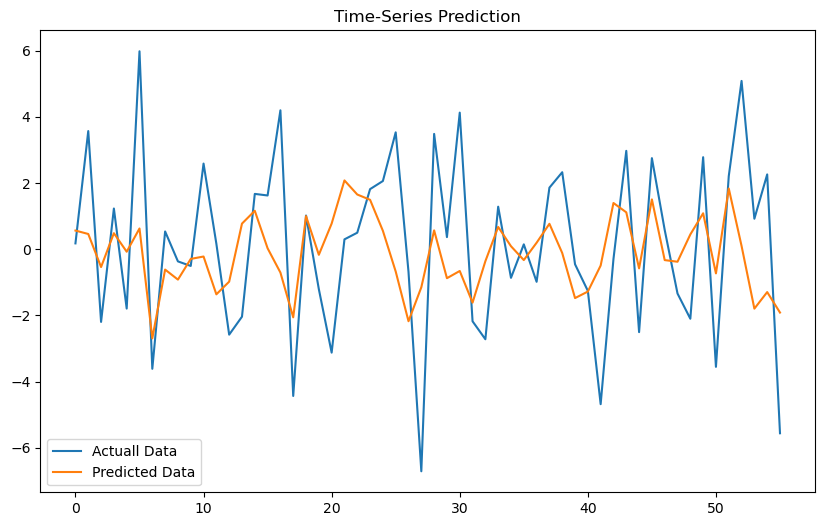

In [3310]:
train_predict = lstm1(X_test_tensors_final)
data_predict = train_predict.data.numpy() 
dataY_plot = y_test_tensors.data.numpy()

plt.figure(figsize=(10,6)) 

plt.plot(dataY_plot, label='Actuall Data') 
plt.plot(data_predict, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [3311]:
len(data_predict)

56

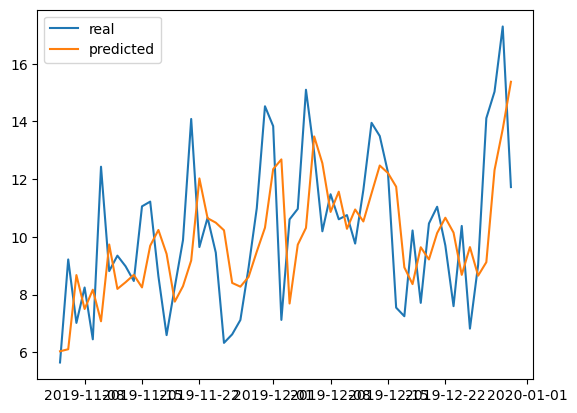

In [3312]:
predicted = []
for previous, pred in zip(real_data[:-1], data_predict):
# for previous, pred in zip(real_data, data_predict):
# print(previous,pred)
    predicted.append(previous+pred)
plt.plot(real_data[1:].index, real_data[1:], label = 'real')
plt.plot(real_data[1:].index, predicted, label = 'predicted')
plt.legend()
plt.show()

In [3313]:
r2_score(real_data[1:], predicted)

0.12672219146627062

In [3229]:
torch.save(lstm1, 'lstm26_dag')

In [3166]:
model = torch.load('lstm26_dag_16')
model.eval()

LSTM1(
  (lstm): LSTM(3, 30, batch_first=True)
  (fc_1): Linear(in_features=30, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

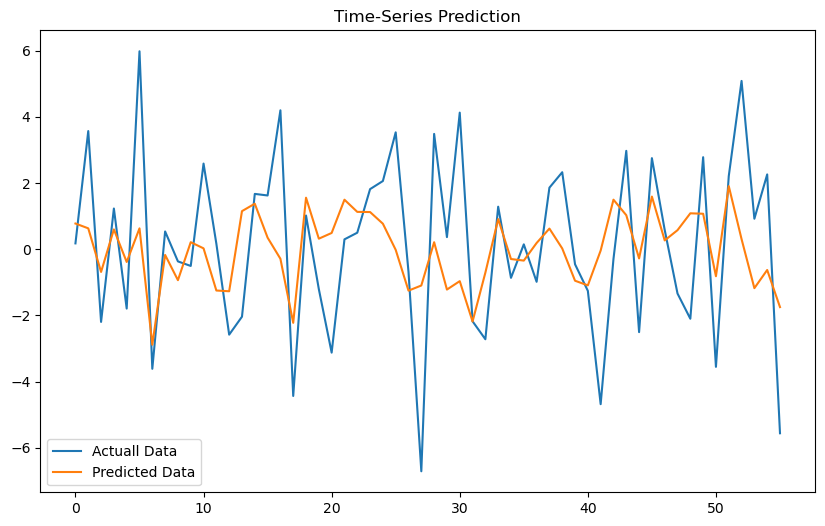

In [3167]:
train_predict = model(X_test_tensors_final)
data_predict = train_predict.data.numpy() 
dataY_plot = y_test_tensors.data.numpy()

plt.figure(figsize=(10,6)) 

plt.plot(dataY_plot, label='Actuall Data') 
plt.plot(data_predict, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [3168]:
len(data_predict)

56

In [3169]:
real_data = df026_dag['perdag_verbruik'][:-2][307:]
len(real_data)

57

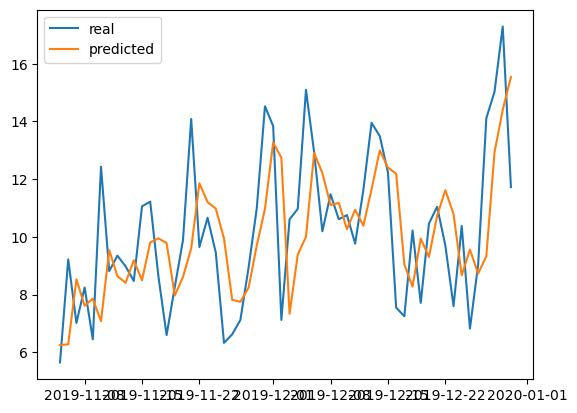

In [3170]:
predicted = []
for previous, pred in zip(real_data[:-1], data_predict):
# for previous, pred in zip(real_data, data_predict):
# print(previous,pred)
    predicted.append(previous+pred)
plt.plot(real_data[1:].index, real_data[1:], label = 'real')
plt.plot(real_data[1:].index, predicted, label = 'predicted')
plt.legend()
plt.show()

In [3171]:
r2_score(real_data[1:], predicted)

0.16277123680691008